# Objective : Understanding the elbow method for k-means clustering

# (1) Implement elbow method to determine the number of clusters using TOTAL WITHIN SUM OF SQUARES 
# (2) Perform k-means clustering for Mall Customers data with appropriate choice of k
# (3) Give your conclusions by inspecting the centroids 
# (4)  List the objects in various clusters
# (5) Give the silhouette coefficient value

# Step 1 : Importing k-means library from sklearn.cluster

In [1]:
from sklearn.cluster import KMeans # for applying k-means clustering

# Step 2 : Importing the csv file as a dataframe using pandas

In [2]:
import pandas as pd
df=pd.read_csv("MallCustomers.csv")
df

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Step 3 : Removal of non-numeric columns

In [3]:
#X=df.drop("CustomerID",axis=1)
#X=X.drop("Genre",axis=1)
X=df.iloc[:,2:5]
X

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


# Step 4 : Implementing elbow method

In [4]:
twss={} # Initialising an empty dictionary
# Store the values if TWSS for k ranging from 3 to 19
for k in range(3,20):
    model=KMeans(n_clusters=k, random_state=10).fit(X)
    twss[k]=model.inertia_
    

C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
twss # displaying the contents of twss; k-value with total within sum of squares

{3: 143342.751571706,
 4: 104366.15145556197,
 5: 75350.77917248776,
 6: 58300.44332159069,
 7: 51118.949931647294,
 8: 45276.726147644884,
 9: 40764.243769853085,
 10: 37093.56470264091,
 11: 34436.193138664465,
 12: 31806.560746043702,
 13: 30036.49516399385,
 14: 28489.73012715736,
 15: 26152.060897435895,
 16: 25488.532767722463,
 17: 23587.479069760644,
 18: 22459.91349230834,
 19: 20850.372847225015}

# Step 5 : Creating plot of k vs TWSS

In [6]:
import matplotlib.pyplot as plt

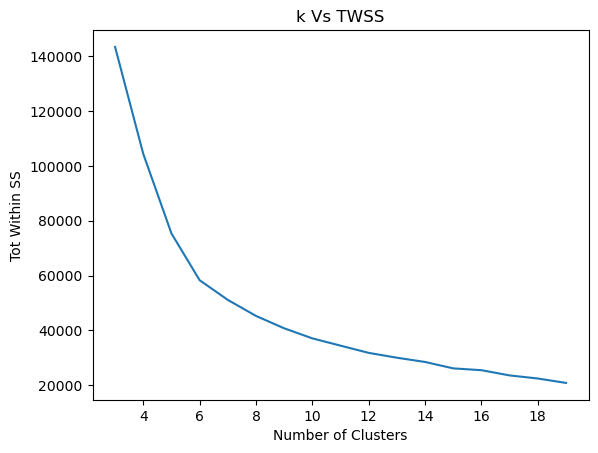

In [7]:
plt.plot(list(twss.keys()),list(twss.values()))
plt.title("k Vs TWSS")
plt.xlabel("Number of Clusters")
plt.ylabel("Tot Within SS")
plt.show()

# By studying the TWSS values we recommend the choice k=6

# Implementing k-means clustering with k=6

In [8]:
k=6
model=KMeans(n_clusters=k, random_state=10).fit(X)
centers = model.cluster_centers_  # centers give me final centroids as obtained in the last iteration

C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Displaying the centroids of 6 clusters formedf

In [9]:
centers

array([[27.        , 56.65789474, 49.13157895],
       [41.68571429, 88.22857143, 17.28571429],
       [56.15555556, 53.37777778, 49.08888889],
       [25.27272727, 25.72727273, 79.36363636],
       [32.69230769, 86.53846154, 82.12820513],
       [44.14285714, 25.14285714, 19.52380952]])

In [10]:
for i in range(6):
    print ("\nCentroid for cluster: ", i+1, "is ",centers[i])



Centroid for cluster:  1 is  [27.         56.65789474 49.13157895]

Centroid for cluster:  2 is  [41.68571429 88.22857143 17.28571429]

Centroid for cluster:  3 is  [56.15555556 53.37777778 49.08888889]

Centroid for cluster:  4 is  [25.27272727 25.72727273 79.36363636]

Centroid for cluster:  5 is  [32.69230769 86.53846154 82.12820513]

Centroid for cluster:  6 is  [44.14285714 25.14285714 19.52380952]


# Conclusions regarding centroids

Cluster - 1 : Younger group with medium level income and medium rating <br>
Cluster - 2  : Around 40 age group with high income but with  low credit rating <br>
Cluster - 3  : Senior group with middle level income and middle level credit rating<br>
Cluster - 4 : Younger group with low income but with good credit rating
Cluster - 5 : Relatively younger group with high income and high rating <br>
Cluster - 6 : Not a trustworthy group which contains people with low income and low rating

# Computing the cluster sizes

In [11]:
labels=model.fit_predict(X)
print(labels) # print the cluster indices of all the objects

C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5
 3 5 3 2 3 2 0 5 3 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 4 0 4 1 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [12]:
import numpy as np
print(np.bincount(labels))

[38 35 45 22 39 21]


# Computing silhouette_score

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
sil_value=silhouette_score(X,labels) # computing the silhouette coefficient

In [15]:
print(sil_value)

0.4523443947724053


The silhouette value is not very encouraging. Hence, we conclude that the quality of clusters is not good